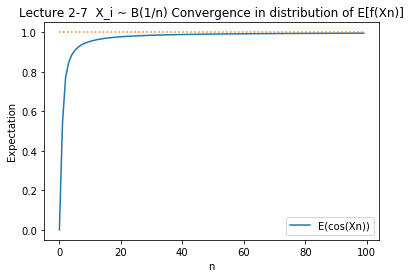

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lecture2_7(f, n_max = 100):
    # param f: a bounded function
    # X_n ~ B(1/n) Bernouilli r.v.
    E_f_x_n = np.zeros(n_max)
    for n in range(1, n_max):
        E_f_x_n[n] = f(1)/n + f(0)*(1-1/n)
    fig, ax = plt.subplots(1, 1)
    ax.plot(range(n_max), E_f_x_n, label='E(cos(Xn))')
    ax.legend()
    ax.set_xlabel('n')
    ax.set_ylabel('Expectation')
    ax.set_title('Lecture 2-7  X_i ~ B(1/n) Convergence in distribution of E[f(Xn)]')
    ax.plot(range(n_max), np.ones(n_max), linestyle=':')
    plt.show()

lecture2_7(np.cos)

* Compute quantile

In [3]:
from scipy.stats import norm
one_minus_alpha = 0.5
alpha = 1 - one_minus_alpha

q_alpha = norm.ppf(1-alpha)
q_alpha_2 = norm.ppf(1-alpha/2)
print(q_alpha_2)

0.6744897501960817


* Finding roots

In [10]:
from numpy import roots

# quadratic eaquation Ap^2+Bp+C
roots([1.038416, -1.328416, 0.416025]) 

array([0.73182936, 0.54744215])